# Forum Group Discussion MK Praktikum Unggulan (Praktikum DGX)
---
Forum Group Discussion ini dilaksanakan sebagai wadah diskusi peserta untuk mendalami materi yang berkaitan dengan MK Praktikum Unggulan (Praktikum DGX), guna mendukung pemahaman konsep, analisis permasalahan, serta penerapan materi sesuai dengan ruang lingkup program studi.

# Prediksi Efektivitas Media Iklan Menggunakan Data Periklanan
---
Hands-on ini bertujuan untuk menganalisis dan memprediksi efektivitas media periklanan berdasarkan data pada Advertising dataset.

## Tujuan

Setelah menyelesaikan Hands-on ini, diharapkan peserta  dapat:

* Melakukan EDA untuk memahami pola dan hubungan antar variabel pada dataset Advertising.
* Mengimplementasikan model Linear Regression untuk prediksi nilai target.
* Mengevaluasi akurasi model menggunakan metrik regresi dan visualisasi hasil prediksi.

<a id='home'></a>
<h2>Daftar Isi</h2>

- <a href=#CRISP_DM>CRISP-DM</a>
- <a href=#Business>Business Understanding</a>
- <a href=#Understanding>Data Understanding</a>
- <a href=#Preparation>Data Preparation</a>
- <a href=#Modelling>Modelling</a>
- <a href=#Evaluation>Evaluation Model</a>
- <a href=#Deployment>Deployment</a>

<a id='Business'></a>
# Business Understanding
<hr>
Dalam dunia bisnis dan pemasaran, perusahaan mengalokasikan anggaran yang besar untuk berbagai media periklanan seperti TV, radio, dan surat kabar dengan harapan dapat meningkatkan hasil pemasaran. Namun, tidak semua media periklanan memberikan dampak yang sama terhadap efektivitas kampanye. Oleh karena itu, perusahaan perlu memahami seberapa besar pengaruh masing-masing media periklanan agar anggaran dapat digunakan secara optimal.

Permasalahan utama yang dihadapi adalah kurangnya pemahaman berbasis data dalam menentukan media periklanan mana yang paling efektif. Keputusan sering kali dibuat berdasarkan intuisi atau pengalaman semata, sehingga berisiko menyebabkan pemborosan biaya iklan.

Melalui project ini, digunakan Advertising dataset (advertising.csv) untuk menganalisis hubungan antara biaya iklan pada berbagai media periklanan dengan tingkat efektivitasnya. Dengan menerapkan metode Linear Regression, diharapkan dapat dibangun model prediktif yang mampu:

* Mengidentifikasi pengaruh masing-masing media periklanan terhadap efektivitas iklan

* Memprediksi tingkat efektivitas iklan berdasarkan besarnya biaya iklan yang dikeluarkan

* Memberikan insight berbasis data untuk membantu pengambilan keputusan strategi pemasaran

Tujuan dari project ini diharapkan dapat membantu perusahaan dalam mengoptimalkan alokasi anggaran periklanan sehingga kampanye pemasaran menjadi lebih efektif dan efisien.

<a id='Understanding'></a>
# Data Understanding
<hr>
Tahap Data Understanding ini bertujuan untuk :

* Memahami struktur dan isi dataset
* Mengidentifikasi variabel input dan output
* Menelaah data dengan metode statistik
* Menelaah data dengan metode visualisasi

Dataset bisa didownload melalui tautan : https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset

In [ ]:
# Import library
import pandas as pd

In [ ]:
# Memuat file csv ke dataframe pandas
df = pd.read_csv('Advertising.csv')

In [ ]:
# Menampilkan 5 data teratas
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df['Radio'].max()

49.6

## Dataset:
Dataset yang digunakan merupakan Advertising dataset (advertising.csv) yang berisi data pengeluaran iklan pada beberapa media periklanan serta hasil efektivitas iklan. Dataset ini digunakan untuk memahami hubungan antara biaya iklan dan tingkat efektivitas kampanye periklanan.

Dataset terdiri dari beberapa variabel numerik dengan deskripsi sebagai berikut:
* TV        : Biaya iklan yang dikeluarkan pada media televisi
* Radio     : Biaya iklan yang dikeluarkan pada media radio
* Newspaper : Biaya iklan yang dikeluarkan pada media surat kabar
* Sales     : Tingkat efektivitas iklan yang diukur melalui hasil penjualan

Variabel TV, Radio, dan Newspaper berperan sebagai variabel independen (fitur), sedangkan Sales merupakan variabel dependen (target) yang merepresentasikan efektivitas media periklanan.

### Jumlah Data

In [ ]:
# Mengetahui berapa jumlah baris dan kolom pada dataset
baris, kolom = df.shape
print("Jumlah baris: ", baris)
print("Jumlah kolom: ", kolom)

Jumlah baris:  200
Jumlah kolom:  5


### Menelaah data dengan metode statistik

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Fungsi <code>.info()</code> memberikan informasi ringkas tentang dataset, termasuk jumlah baris dan kolom, nama kolom, tipe data, serta jumlah nilai non-null dan penggunaan memori.

In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<code>.describe()</code> digunakan untuk memberikan ringkasan statistik deskriptif dari dataset. Fungsi ini menyediakan informasi seperti jumlah data non-null, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum.

Dari ringkasan di atas dapat diketahui beberapa hal, di antaranya :
- Tidak terdapat missing value / null pada semua kolom di dataset
- Semua kolom mempunyai tipe data numerik
- Terdapat kolom yang bernama Unnamed: 0. Nama kolom ini perlu diubah


In [ ]:
# Mengubah nama kolom
df.rename(columns={'Unnamed: 0':'ID'},inplace=True)

In [ ]:
# Mencari nilai duplikat yang ada pada dataset
nilai_duplikat = df.duplicated().sum()
print("Jumlah nilai duplikat pada dataset: ", nilai_duplikat)

Jumlah nilai duplikat pada dataset:  0


### Menelaah data dengan metode visualisasi

In [ ]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

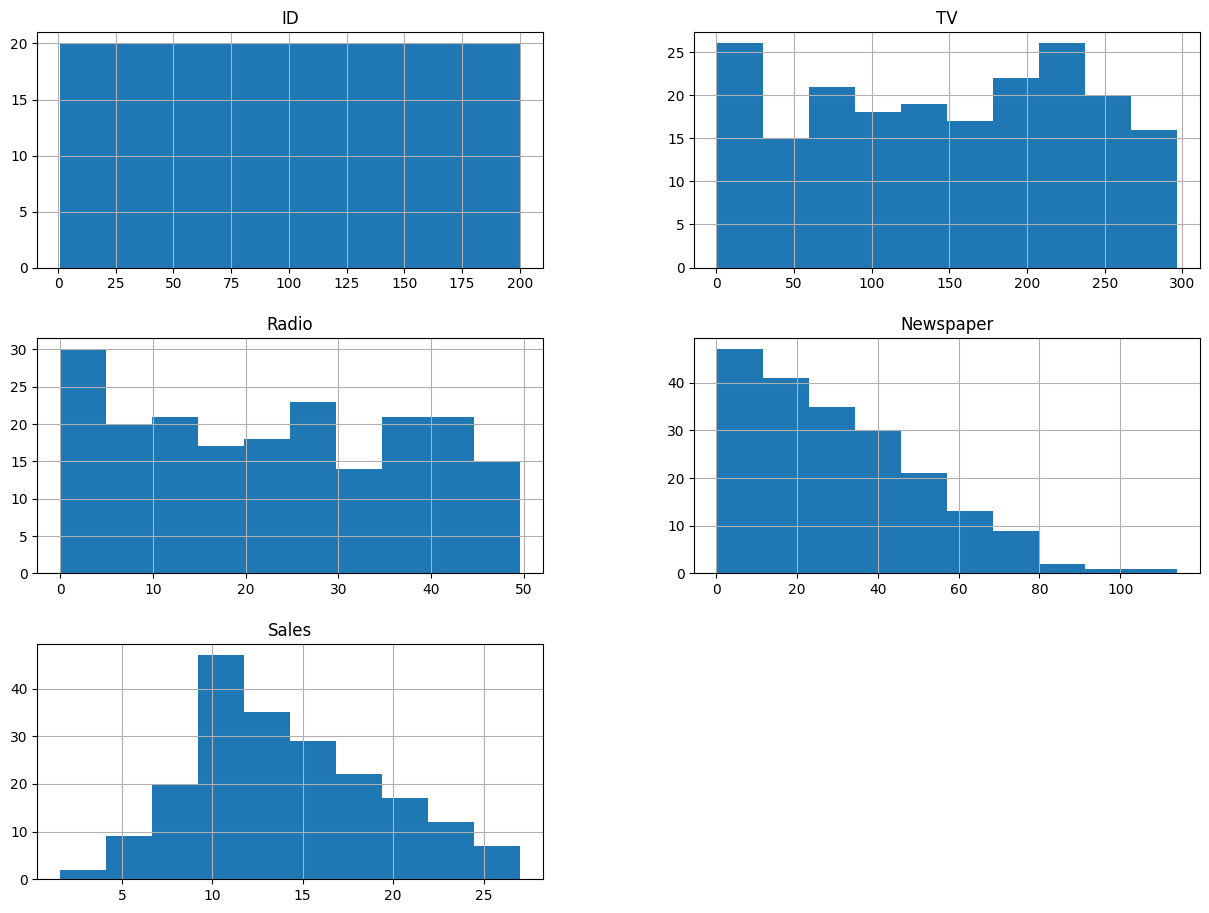

In [ ]:
# Mengetahui persebaran nilai pada setiap kolom
df.hist(figsize=(15,11))

<code>.hist()</code> merupakan kode untuk melakukan histogram plot, dimana pada plot ini daapt dilihat persebaran data/nilai dari masing-masing kolom

Dari histogram plot di atas dapat diketahui beberapa hal, di antaranya :
- TV :
  - Nilai TV tersebar cukup merata dari ~0 sampai ~300
  - Tidak terlalu skewed (relatif seimbang)
  - Variasi besar → bagus untuk model
- Radio :
  - Distribusi cukup merata dari ~0 sampai ~50
  - Sedikit fluktuatif tapi tidak ekstrem
  - Tidak terlihat skew berat
- Newspaper
  - Distribusi right-skewed (skew ke kanan)
  - Banyak nilai kecil (0–30)
  - Sedikit nilai sangat besar (outlier sampai >100)
- Sales (Target kolom)
  - Distribusi mendekati normal
  - Puncak di sekitar 10–15
  - Sedikit skew ke kanan


<Axes: >

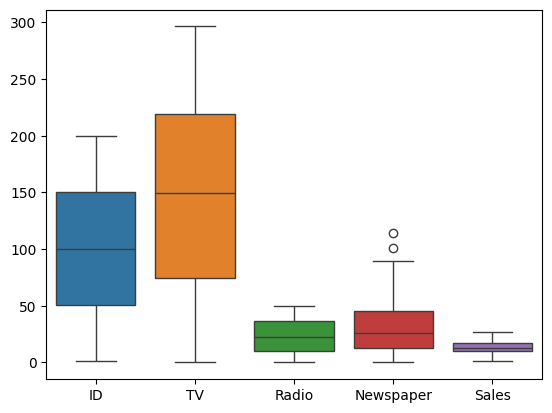

In [ ]:
# Memeriksa outlier pada setiap kolom
sns.boxplot(data=df)

<code>.boxplot()</code> merupakan kode untuk membuat boxplot, dimana plot ini menampilkan nilai minimum, maksimum, kuartil, dan median. Boxplot juga digunakan untuk mendeteksi outlier, yaitu nilai yang berada jauh di luar sebaran utama data.

Garis di tengah kotak adalah Median
- Nilai tengah data (50% data di bawah, 50% di atas).

Garis di atas dan bawah kotak adalah Q1 dan Q3
- Q1 (Kuartil 1): batas 25% data terbawah
- Q3 (Kuartil 3): batas 75% data teratas

Panjang kotak adalah IQR (Interquartile Range)
- IQR = Q3 − Q1
- Menunjukan sebaran datanya

Garis ke atas & bawah (Whisker)
- Menunjukkan jangkauan data normal

Titik di luar whisker adalah outlier

Dari boxplot di atas dapat diketahui beberapa hal, di antaranya :
- Kolom Newspaper memiliki 2 nilai outlier

In [ ]:
# Mengetahui korelasi fitur antar kolom
corr = df.corr()
corr

,ID,TV,Radio,Newspaper,Sales
ID,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<code>.corr()</code> digunakan untuk menghitung korelasi antar fitur kolom, dimana kuat/tidaknya korelasi ditentukan dari rentang nilai -1 higga 1

<Axes: >

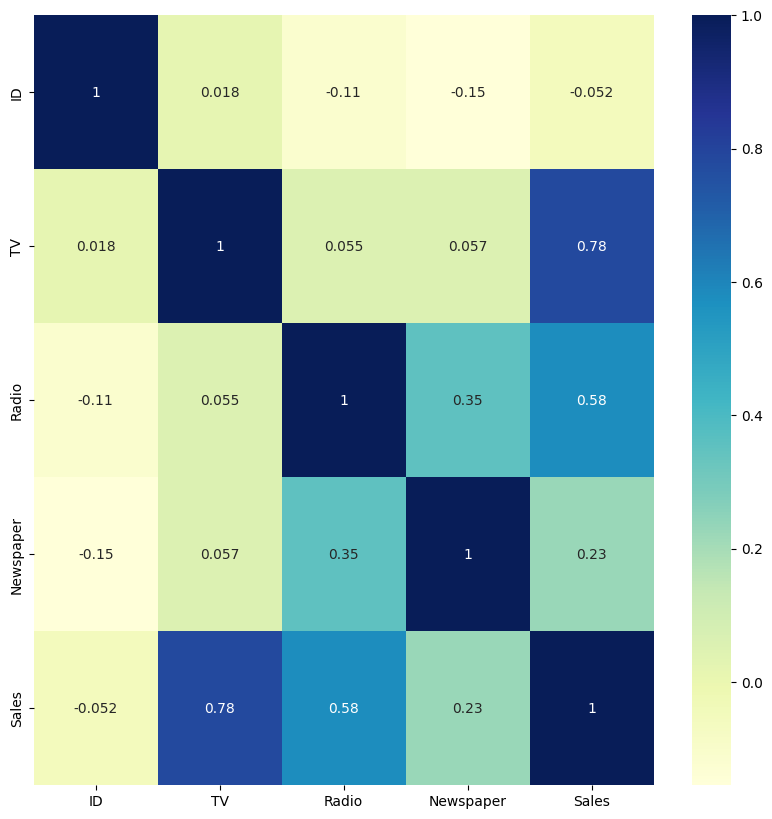

In [ ]:
# Mengetahui korelasi fitur antar kolom menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

<code>.heatmap()</code> digunakan untuk memvisualisasikan matriks korelasi dalam bentuk peta warna (heatmap). Visualisasi ini membantu menunjukkan kekuatan dan arah hubungan antar fitur, dimana perbedaan warna merepresentasikan nilai korelasi yang dihasilkan dari fungsi <code>.corr()</code>

Heatmap diatas menunjukan korelasi antar ID, TV, Radio, Newspaper, Sales

Angka di dalam kotak adalah nilai korelasi (Pearson):
- Nilai mendekati 1 → hubungan kuat positif

- Nilai mendekati 0 → hubungan lemah

- Nilai negatif → hubungan berlawanan arah

Warna:

🔵 Biru tua → korelasi kuat

🟢 Hijau → korelasi sedang

🟡 Kuning pucat → korelasi lemah / hampir tidak ada

### Mengecek Missing value dan Outlier

In [ ]:
#Memeriksa nilai yang hilang pada setiap kolom
df.isnull().sum()

,0
ID,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
# Memilih kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_count = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    print(f"{col}: {outlier_count} outlier")


ID: 0 outlier
TV: 0 outlier
Radio: 0 outlier
Newspaper: 2 outlier
Sales: 0 outlier


<a id='Preparation'></a>
# Data Preparation
<hr>
Pada bagian Data Preparation data akan diproses terlebih dahulu sebelum diinput ke model

### Data Cleaning


Karena tidak ada kolom yang hilang maka tidak perlu dilakukan imputasi

In [ ]:
# Menghapus kolom ID
df.drop(columns='ID',inplace=True)

In [ ]:
# Menghapus nilai outliers untuk setiap kolom
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    df_clean = df_clean[
        (df_clean[col] >= Q1 - 1.5*IQR) &
        (df_clean[col] <= Q3 + 1.5*IQR)
    ]

In [ ]:
df_clean.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Split train & test

Train–test split berfungsi untuk membagi dataset menjadi dua bagian:

* Data train → untuk melatih model

* Data test → untuk menguji performa model pada data yang belum pernah dilihat

In [ ]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_clean.drop(columns='Sales', axis=1)
y = df_clean['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Normalisasi menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id='Modelling'></a>
# Modelling
<hr>

### Linear Regression

Linear Regression digunakan untuk memprediksi nilai dengan cara mencari garis lurus terbaik yang menggambarkan hubungan antara:
- Fitur (X)
- Target (y)
Cara kerjanya bisa dilihat dari contoh regresi plot dibawah ini :

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


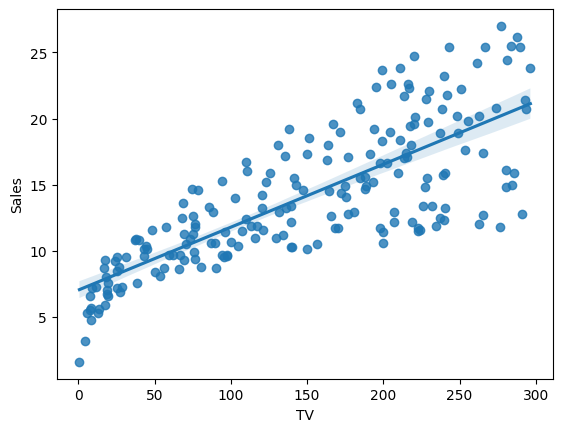

In [ ]:
sns.regplot(x='TV',y='Sales',data=df)
df[['TV','Sales']].corr()

Visual Sederhana

- Titik-titik → data asli

- Garis → hasil prediksi model

- Jarak titik ke garis → error

Semakin dekat titik ke garis, semakin baik modelnya.

Jadi dapat dikatakan Linear regression ini bekerja dengan mencari garis lurus terbaik yang meminimalkan selisih antara nilai prediksi dan nilai aktual, sehingga dapat digunakan untuk memprediksi nilai berdasarkan hubungan linear antar variabel.

### Memilih model Linear Regression

In [ ]:
# Import library
from sklearn.linear_model import LinearRegression

In [ ]:
# Inisialisasi model Linear Regression
model = LinearRegression()

# Latih Model
model.fit(X_train_scaled, y_train)

LinearRegression()

### Melakukan prediksi pada data test dan train


In [ ]:
# Prediksi pada data train
y_train_pred = model.predict(X_train_scaled)

# Prediksi pada data test
y_test_pred = model.predict(X_test_scaled)

<a id='Evaluation'></a>
# Evaluation Model
<hr>
Tujuan evaluasi model untuk menilai seberapa baik model memprediksi nilai aktual dan memastikan model dapat digeneralisasi ke data baru.

### Mengukur Akurasi Prediksi
menggunakan MAE, MSE, RMSE, R²

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
print("Data Train")
print("MAE :", mean_absolute_error(y_train, y_train_pred))
print("MSE :", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Akurasi pada data train (R2) adalah  :", r2_score(y_train, y_train_pred))

print("\nData Test")
print("MAE :", mean_absolute_error(y_test, y_test_pred))
print("MSE :", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Akurasi pada data test (R2) adalah  :", r2_score(y_test, y_test_pred))

Data Train
MAE : 1.2765674739970587
MSE : 2.8499667092891126
RMSE: 1.6881844417270029
Akurasi pada data train (R2) adalah  : 0.8935961872087126

Data Test
MAE : 1.2497394075236385
MSE : 2.7409119066899956
RMSE: 1.6555699642993031
Akurasi pada data test (R2) adalah  : 0.8989454779619588


#### Interpretasi singkat

model menunjukan performa yang cukup baik, karena :
* Nilai R² yang cukup tinggi Train: 0,89 dan Test: 0,90, Artinya sekitar 89–90% variasi data target dapat dijelaskan oleh model.
* Perbedaan performa train dan test sangat kecil yang artinya tidak terjadi overfitting dan model mampu menggeneralisasi dengan baik ke data baru.
* Nilai MAE dan RMSE relatif rendah dan konsisten yang artinya kesalahan prediksi rata-rata kecil dan stabil pada data train maupun test.


### Mengukur Akurasi Prediksi Menggunakan Visualisasi

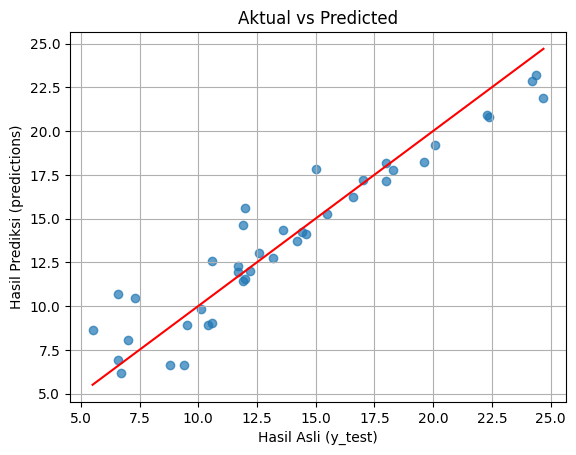

In [ ]:
# Plot untuk mengetahui seberapa akurat hasil prediksi dengan hasil aslinya pada data test
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Hasil Asli (y_test)")
plt.ylabel("Hasil Prediksi (predictions)")
plt.title("Aktual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # garis ideal
plt.grid(True)
plt.show()

* Titik-titik banyak berada di dekat garis merah (garis ideal), artinya model mendekati nilai aktual namun tidak terlihat indikasi overfitting
* Pola linear terlihat cukup jelas, artinya model cukup baik menangkap hubungan linear antar fitur dan target

In [ ]:
X_new = np.array([[100, 59, 25]])

In [ ]:
y_pred_new = model.predict(X_new)

In [ ]:
y_pred_new

array([566.5398695])

<a id='Deployment'></a>
# Deployment
<hr>
Deployment itu adalah proses menaruh aplikasi/model yang sudah jadi ke environment produksi supaya bisa digunakan orang lain

Tujuanya untuk :  
- Agar user bisa memakai model, mulai dari input data sampai mendapatkan hasil
- Demonstrasi project untuk user


In [ ]:
import joblib

joblib.dump(model, 'prediksi_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
df_clean.to_csv('data_clean.csv')

# Sumber dan Referensi

- Elmetwally, T. (n.d.). Advertising Dataset [Dataset]. Kaggle. https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset


---


Copyright © 2025 by Pengelola MK Praktikum Unggulan (Praktikum DGX), Universitas Gunadarma


https://www.praktikum-hpc.gunadarma.ac.id/ <br>
https://www.hpc-hub.gunadarma.ac.id/ <br>